## Import libraries

In [5]:
import pandas as pd #Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [6]:
import warnings #Ignore warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [8]:
data="D:\Titanic-Dataset.csv" #Read data into a dataframe
df=pd.read_csv(data, header=None)

## Exploratory Data Analysis (EDA)

In [10]:
df.shape #Check size of the dataset

(892, 12)

In [11]:
df.head() #Preview data

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [12]:
col_names=['PassengerID','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'] #Rename column names 
df.columns=col_names
col_names

['PassengerID',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [13]:
df.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [14]:
df = df.drop(index=0).reset_index(drop=True) #dropping unnecessary 0th cell
df.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [15]:
df.info() #gather information about all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerID  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


In [16]:
col_names=['PassengerID','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'] 
for col in col_names:
    print(df[col].value_counts())  #Checking values of each variables

PassengerID
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24      30
22      27
18      26
19      25
28      25
        ..
36.5     1
55.5     1
0.92     1
23.5     1
74       1
Name

In [17]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Handling missing values

In [19]:
df.isnull().sum() #check for null values 

PassengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df['Age']=pd.to_numeric(df['Age']) #replacing missing data in age with mean after converting age to numerical type
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age,inplace=True)

In [21]:
df['Cabin']=pd.Categorical(df['Cabin']) #replacing missing data in cabin with mode after converting cabin to categorical type
mode_cabin=df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_cabin,inplace=True)


In [22]:
df['Embarked']=pd.Categorical(df['Embarked']) #replacing missing data in embarked with mode after converting embarked to categorical type
mode_cabin=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_cabin,inplace=True)

In [23]:
df.isnull().sum() #checking if any missing values are remaining 

PassengerID    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Removing unnecessary information

In [25]:
#dropping passengerID column because it is irrelavant in predicting if a person survives or not 
df=df.drop(columns=['PassengerID'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,B96 B98,S


In [26]:
# dropping names but keeping surnames because social status might be a key feature in survival
df['Name']=df['Name'].str.split(',').str[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Braund,male,22.0,1,0,A/5 21171,7.25,B96 B98,S
1,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,1,1,Futrelle,female,35.0,1,0,113803,53.1,C123,S
4,0,3,Allen,male,35.0,0,0,373450,8.05,B96 B98,S


In [27]:
# Raw ticket numbers have low predictive value but prefixes may indicate class/fare group
df['Ticket']=df['Ticket'].str.split(' ').str[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Braund,male,22.0,1,0,A/5,7.25,B96 B98,S
1,1,1,Cumings,female,38.0,1,0,PC,71.2833,C85,C
2,1,3,Heikkinen,female,26.0,0,0,STON/O2.,7.925,B96 B98,S
3,1,1,Futrelle,female,35.0,1,0,113803,53.1,C123,S
4,0,3,Allen,male,35.0,0,0,373450,8.05,B96 B98,S


In [28]:
#Cabin.no has too many unique values, but deck level (A, B, C etc) might change prediction therefor extract them.
df['Cabin']=df['Cabin'].str[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Braund,male,22.0,1,0,A/5,7.25,B,S
1,1,1,Cumings,female,38.0,1,0,PC,71.2833,C,C
2,1,3,Heikkinen,female,26.0,0,0,STON/O2.,7.925,B,S
3,1,1,Futrelle,female,35.0,1,0,113803,53.1,C,S
4,0,3,Allen,male,35.0,0,0,373450,8.05,B,S


### Removing outliers from data 

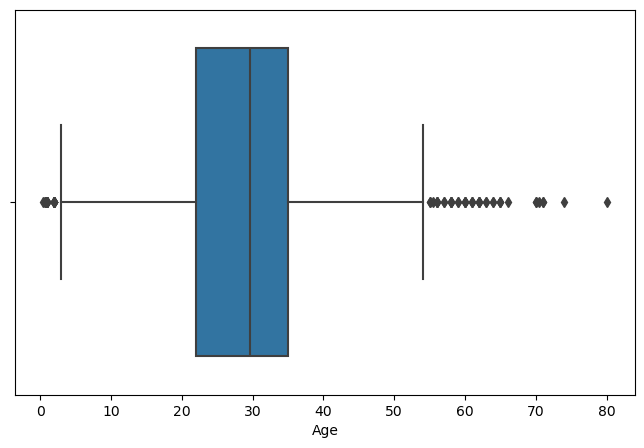

In [30]:
#now checking for outliers in the data
clean_age=df['Age'].dropna() #creating a temporory variable without missing value to check for outliers in age
clean_age=pd.to_numeric(clean_age)
plt.figure(figsize=(8,5))
sns.boxplot(x=clean_age)
plt.show()
#similarly, there must me more outliers in other numerical data

In [31]:
# Function to remove outliers for all numeric columns
def remove_outliers(df):
    # Iterate through each numeric column
    for col in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define outlier bounds
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Filter out rows where the column value is outside the outlier bounds
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
        
    return df

# Remove outliers from the entire dataset
df = remove_outliers(df)

# Display the cleaned DataFrame
print(df)


    Survived Pclass       Name     Sex        Age SibSp Parch    Ticket  \
0          0      3     Braund    male  22.000000     1     0       A/5   
1          1      1    Cumings  female  38.000000     1     0        PC   
2          1      3  Heikkinen  female  26.000000     0     0  STON/O2.   
3          1      1   Futrelle  female  35.000000     1     0    113803   
4          0      3      Allen    male  35.000000     0     0    373450   
..       ...    ...        ...     ...        ...   ...   ...       ...   
886        0      2   Montvila    male  27.000000     0     0    211536   
887        1      1     Graham  female  19.000000     0     0    112053   
888        0      3   Johnston  female  29.699118     1     2     W./C.   
889        1      1       Behr    male  26.000000     0     0    111369   
890        0      3     Dooley    male  32.000000     0     0    370376   

        Fare Cabin Embarked  
0       7.25     B        S  
1    71.2833     C        C  
2      7.

## Declare feature vector and target variable 

In [33]:
#Now that data has been cleaned and structured, the feature variable is dropped from the dataset and the dataset is divided 
x = df.drop(['Survived'],axis=1)
y = df['Survived']

## Seperate data into seperate training and test set

In [35]:
#Seperate the data into seperate training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 43)

In [36]:
#check the shape of the X_train and X_test
X_train.shape, X_test.shape

((552, 10), (273, 10))

In [37]:
#check data types in X_train
X_train.dtypes

Pclass        object
Name          object
Sex           object
Age          float64
SibSp         object
Parch         object
Ticket        object
Fare          object
Cabin         object
Embarked    category
dtype: object

## Feature Engineering 

In [39]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,3,Baclini,female,5.000000,2,1,2666,19.2583,B,C
203,3,Youseff,male,45.500000,0,0,2628,7.225,B,C
546,2,Beane,female,19.000000,1,0,2908,26,B,S
147,3,Ford,female,9.000000,2,2,W./C.,34.375,B,S
196,3,Mernagh,male,29.699118,0,0,368703,7.75,B,Q


In [40]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the original data before transforming
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

### 1. Hashing Encoder for high-cardinality feature: 'Name'
hash_enc = ce.HashingEncoder(cols=['Name'])
X_train_name = hash_enc.fit_transform(X_train_enc[['Name']])
X_test_name = hash_enc.transform(X_test_enc[['Name']])
X_train_enc = X_train_enc.drop('Name', axis=1)
X_test_enc = X_test_enc.drop('Name', axis=1)
X_train_enc = pd.concat([X_train_enc.reset_index(drop=True), X_train_name.reset_index(drop=True)], axis=1)
X_test_enc = pd.concat([X_test_enc.reset_index(drop=True), X_test_name.reset_index(drop=True)], axis=1)

### 2. Label Encoding for binary feature: 'Sex'
le = LabelEncoder()
X_train_enc['Sex'] = le.fit_transform(X_train['Sex'])
X_test_enc['Sex'] = le.transform(X_test['Sex'])

### 3. OneHot Encoding for 'Ticket', 'Cabin', 'Embarked'
# Only transform these columns, then join back
ohe = ce.OneHotEncoder(cols=['Ticket', 'Cabin', 'Embarked'], use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train[['Ticket', 'Cabin', 'Embarked']])
X_test_ohe = ohe.transform(X_test[['Ticket', 'Cabin', 'Embarked']])

# Drop the original categorical columns
X_train_enc = X_train_enc.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)
X_test_enc = X_test_enc.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

# Add the new encoded columns
X_train_enc = pd.concat([X_train_enc.reset_index(drop=True), X_train_ohe.reset_index(drop=True)], axis=1)
X_test_enc = pd.concat([X_test_enc.reset_index(drop=True), X_test_ohe.reset_index(drop=True)], axis=1)

In [41]:
X_train_enc.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,col_0,col_1,col_2,col_3,...,Cabin_C,Cabin_T,Cabin_D,Cabin_F,Cabin_E,Cabin_A,Cabin_G,Embarked_C,Embarked_S,Embarked_Q
0,3,0,5.000000,2,1,19.2583,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,45.500000,0,0,7.225,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,19.000000,1,0,26,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,9.000000,2,2,34.375,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,1,29.699118,0,0,7.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
X_test_enc.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,col_0,col_1,col_2,col_3,...,Cabin_C,Cabin_T,Cabin_D,Cabin_F,Cabin_E,Cabin_A,Cabin_G,Embarked_C,Embarked_S,Embarked_Q
0,3,0,16.0,0,0,7.7333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,44.0,0,0,7.925,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,36.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2,0,34.0,1,1,32.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,29.0,1,0,26,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Decision Tree Classifier with criterion Gini Index 

In [44]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
#instantiate the DecisionTreeClassifier model with criterion Gini Index 
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)

#fit the model 
clf_gini.fit(X_train_enc, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the test results with criterion Gini Index

In [47]:
y_pred_gini = clf_gini.predict(X_test_enc)

### Check accuracy score with criterion Gini Index

In [49]:
from sklearn.metrics import accuracy_score
print("Model Accuracy score with criterion Gini Index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model Accuracy score with criterion Gini Index: 0.7949


###### Here, y_test are the true class labels and y_pred_gini are the predicted class labels in te test set

### Compare the train-set and the test-set accuracy

##### Now, i will compare the train-set and test-set accuracy to check for overfitting 

In [52]:
y_pred_train_gini = clf_gini.predict(X_train_enc)

y_pred_train_gini

array(['1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1',
       '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0

In [53]:
print("Training set accuracy score : {0:0.4f}".format(accuracy_score(y_train, y_pred_train_gini)))

Training set accuracy score : 0.8514


### Check for overfitting and underfitting 

In [55]:
# printing the scores on training and testing 
print("Training set score : {:.4f}".format( clf_gini.score(X_train_enc,y_train)))
print("Testing set score : {:.4f}".format( clf_gini.score(X_test_enc,y_test)))

Training set score : 0.8514
Testing set score : 0.7949


###### the two values are quite comparable, so there is no sign of overfitting.

## Decision Tree Classifier with criterion entropy 

In [58]:
#instantiate the DecisionTreeClassifier model with criterion Entropy Index 
clf_en = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

#fit the model 
clf_en.fit(X_train_enc, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the test results with criterion Entropy 

In [60]:
y_pred_en = clf_en.predict(X_test_enc)

### Check accuracy score with criterion entropy

In [62]:
from sklearn.metrics import accuracy_score
print("Model Accuracy score with criterion Entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model Accuracy score with criterion Entropy: 0.7766


### Compare the train-set and test-set accuracy
##### Now i will compare the train-set and test-set accuracy to check for overfitting 

In [64]:
y_pred_train_en = clf_en.predict(X_train_enc)

y_pred_train_en

array(['1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1',
       '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0

In [65]:
print("Training set accuracy score : {0:0.4f}".format(accuracy_score(y_train, y_pred_train_en)))

Training set accuracy score : 0.8460


### Check for overfitting and underfitting 

In [67]:
# Print the scores on training and test set 
print("Training set score : {:.4f}".format( clf_en.score(X_train_enc,y_train)))
print("Testing set score : {:.4f}".format( clf_en.score(X_test_enc,y_test)))

Training set score : 0.8460
Testing set score : 0.7766


## Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion Matrix\n\n', cm)

Confusion Matrix

 [[136  31]
 [ 30  76]]


## Classification Report

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       167
           1       0.71      0.72      0.71       106

    accuracy                           0.78       273
   macro avg       0.76      0.77      0.77       273
weighted avg       0.78      0.78      0.78       273

